In [4]:
import sys
sys.path.append("/usr/local/lib64/python3.6/site-packages/")

In [5]:
%pylab inline

import pandas as pd
import itertools
import vcf
import upsetplot
import trtools.utils.tr_harmonizer as trh

convert_type_to_idx = {trh.VcfTypes.advntr: 0, trh.VcfTypes.eh: 1,
                       trh.VcfTypes.hipstr: 2,
                       trh.VcfTypes.gangstr: 3}

mergedvcf = "/storage/mgymrek/workspace/1000Genomes-STRs/merge-analysis/all.vcf"

# Creating a multi index for the Series data structure used by upset plot
idx=pd.MultiIndex.from_tuples(
    list(itertools.product([True,False],
                           repeat=len(convert_type_to_idx.keys()))),
    names=[i.name for i in convert_type_to_idx.keys()])
upset_data = pd.Series(index=idx, dtype='float64').fillna(0)

# Update by reading through records
reader = vcf.Reader(open(mergedvcf, "r"))
for record in reader:
    vals = tuple([bool(int(item)) for item in record.INFO["METHODS"].split("|")])
    upset_data[vals] += 1

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['record']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


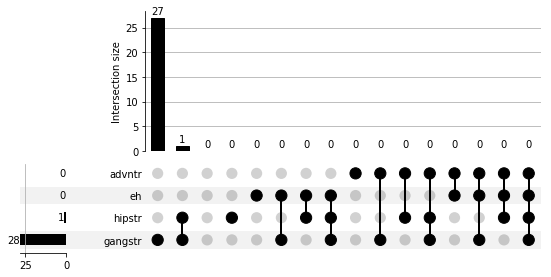

In [6]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data, show_counts='%d', sort_by='cardinality')
plt.show()